In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/iseojun/Desktop/2학년 1학기/인공지능프로그래밍/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
df["class"].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [7]:
X

array([[1, 5, 2, 4],
       [0, 5, 2, 9],
       [0, 0, 2, 8],
       ...,
       [0, 2, 2, 4],
       [1, 3, 3, 4],
       [0, 5, 2, 4]])

In [8]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
df2 = df

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(3,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
 dense_3 (Dense)             (None, 2)                 8         
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
  1/204 [..............................] - ETA: 26s - loss: 0.6913 - accuracy: 0.5625

2023-05-04 11:30:48.746209: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


204/204 [==============================] - 0s 641us/step - loss: 0.5167 - accuracy: 0.7437 - val_loss: 0.4839 - val_accuracy: 0.7514
Epoch 2/100
204/204 [==============================] - 0s 366us/step - loss: 0.4775 - accuracy: 0.7377 - val_loss: 0.5068 - val_accuracy: 0.7397
Epoch 3/100
204/204 [==============================] - 0s 357us/step - loss: 0.4607 - accuracy: 0.7443 - val_loss: 0.4689 - val_accuracy: 0.7569
Epoch 4/100
204/204 [==============================] - 0s 359us/step - loss: 0.4668 - accuracy: 0.7463 - val_loss: 0.4433 - val_accuracy: 0.7612
Epoch 5/100
204/204 [==============================] - 0s 357us/step - loss: 0.4422 - accuracy: 0.7523 - val_loss: 0.4612 - val_accuracy: 0.7594
Epoch 6/100
204/204 [==============================] - 0s 356us/step - loss: 0.4463 - accuracy: 0.7754 - val_loss: 0.3840 - val_accuracy: 0.8357
Epoch 7/100
204/204 [==============================] - 0s 359us/step - loss: 0.4480 - accuracy: 0.7749 - val_loss: 0.4515 - val_accuracy: 0.74

204/204 [==============================] - 0s 358us/step - loss: 0.5141 - accuracy: 0.7686 - val_loss: 0.5044 - val_accuracy: 0.7735
Epoch 58/100
204/204 [==============================] - 0s 357us/step - loss: 0.5138 - accuracy: 0.7686 - val_loss: 0.5025 - val_accuracy: 0.7735
Epoch 59/100
204/204 [==============================] - 0s 356us/step - loss: 0.5120 - accuracy: 0.7686 - val_loss: 0.5296 - val_accuracy: 0.7735
Epoch 60/100
204/204 [==============================] - 0s 357us/step - loss: 0.5149 - accuracy: 0.7613 - val_loss: 0.5332 - val_accuracy: 0.7735
Epoch 61/100
204/204 [==============================] - 0s 357us/step - loss: 0.5147 - accuracy: 0.7686 - val_loss: 0.5240 - val_accuracy: 0.7735
Epoch 62/100
204/204 [==============================] - 0s 357us/step - loss: 0.5124 - accuracy: 0.7686 - val_loss: 0.5169 - val_accuracy: 0.7735
Epoch 63/100
204/204 [==============================] - 0s 357us/step - loss: 0.5127 - accuracy: 0.7686 - val_loss: 0.5035 - val_accuracy

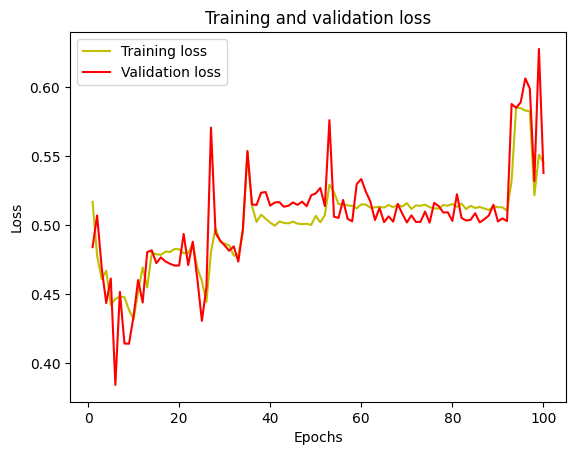

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

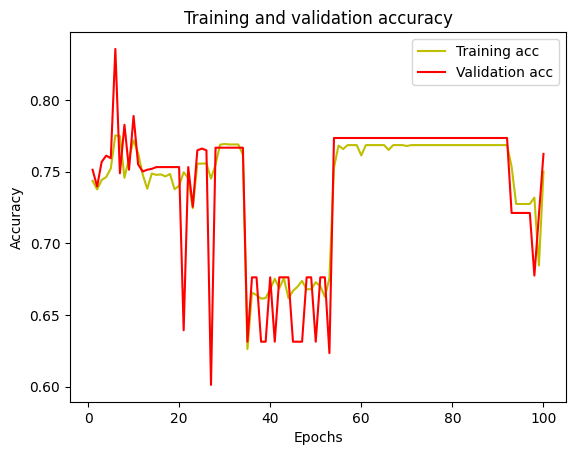

In [13]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       944
           1       0.70      0.75      0.73       681

    accuracy                           0.76      1625
   macro avg       0.76      0.76      0.76      1625
weighted avg       0.77      0.76      0.76      1625

[[728 216]
 [170 511]]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [16]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (4,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                320       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
191/191 [==============================] - 0s 592us/step - loss: 0.1500 - mse: 0.1500 - val_loss: 0.1257 - val_mse: 0.1257
Epoch 2/100
191/191 [==============================] - 0s 385us/step - loss: 0.1121 - mse: 0.1121 - val_loss: 0.1114 - val_mse: 0.1114
Epoch 3/100
191/191 [==============================] - 0s 376us/step - loss: 0.1033 - mse: 0.1033 - val_loss: 0.1013 - val_mse: 0.1013
Epoch 4/100
191/191 [==============================] - 0s 389us/step - loss: 0.0992 - mse: 0.0992 - val_loss: 0.0995 - val_mse: 0.0995
Epoch 5/100
191/191 [==============================] - 0s 378us/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.0966 - val_mse: 0.0966
Epoch 6/100
191/191 [==============================] - 0s 378us/step - loss: 0.0953 - mse: 0.0953 - val_loss: 0.1049 - val_mse: 0.1049
Epoch 7/100
191/191 [==============================] - 0s 378us/step - loss: 0.0936 - mse: 0.0936 - val_loss: 0.0935 - val_mse: 0.0935
Epoch 8/100
191/191 [==============================] - 

191/191 [==============================] - 0s 373us/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0747 - val_mse: 0.0747
Epoch 62/100
191/191 [==============================] - 0s 386us/step - loss: 0.0686 - mse: 0.0686 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 63/100
191/191 [==============================] - 0s 382us/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0782 - val_mse: 0.0782
Epoch 64/100
191/191 [==============================] - 0s 380us/step - loss: 0.0685 - mse: 0.0685 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 65/100
191/191 [==============================] - 0s 377us/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0713 - val_mse: 0.0713
Epoch 66/100
191/191 [==============================] - 0s 377us/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0728 - val_mse: 0.0728
Epoch 67/100
191/191 [==============================] - 0s 377us/step - loss: 0.0679 - mse: 0.0679 - val_loss: 0.0744 - val_mse: 0.0744
Epoch 68/100
191/191 [==============================] - 0s 37

In [25]:
model.evaluate(X_test, y_test)

64/64 [==============================] - 0s 346us/step - loss: 0.0701 - mse: 0.0701


[0.07007498294115067, 0.07007498294115067]

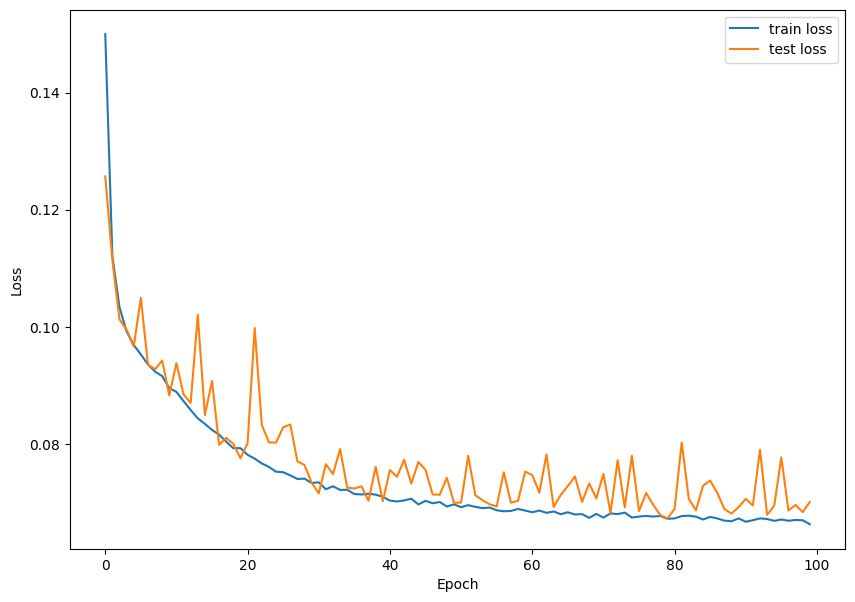

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

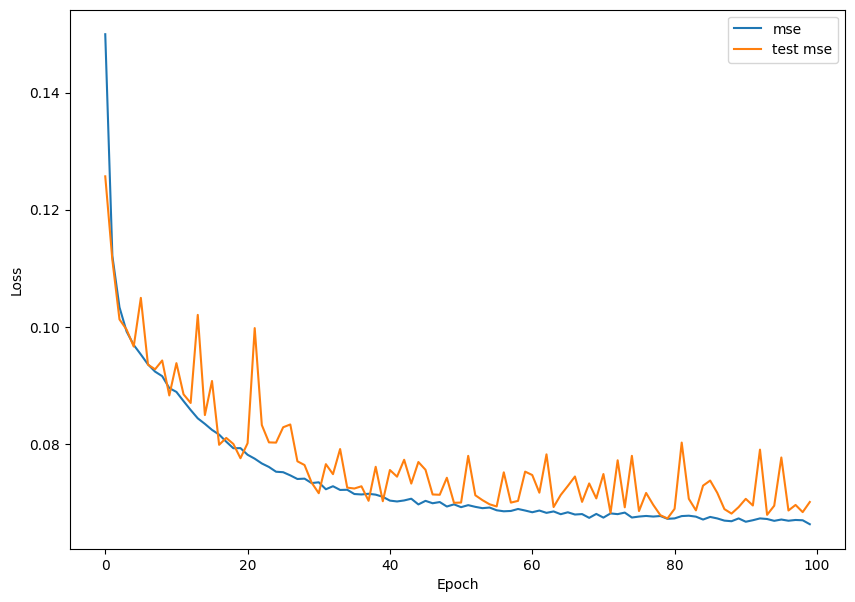

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()